# Python Libraries

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data into Notebook

In [2]:
#Importing World Bank Data and Displaying Header 
world_bank_data = pd.read_csv("world_bank_data.csv")
world_bank_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,134.772341
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.061110
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.591951
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.324186
4,Arab World,ARB,Aquaculture production (metric tons),ER.FSH.AQUA.MT,1960,4600.000000


# Filter the Data
Indicators used in the analysis:
* CO2 emissions from electricity and heat production, total (% of total fuel combustion)
* Electric power transmission and distribution losses (% of output)
* Electricity production from renewable sources, excluding hydroelectric (kWh)
* Electric power consumption (kWh per capita)
* Electricity production from coal sources (% of total)
* Electricity production from hydroelectric sources (% of total)
* Electricity production from natural gas sources (% of total)
* Electricity production from nuclear sources (% of total)
* Electricity production from oil sources (% of total)
* Electricity production from oil, gas and coal sources (% of total)
* Electricity production from renewable sources, excluding hydroelectric (% of total)
* Renewable electricity output (% of total electricity output)

In [3]:
# Indicators being Used for Analysis
indicators = ["CO2 emissions from electricity and heat production, total (% of total fuel combustion)",
"Electric power transmission and distribution losses (% of output)",
"Electricity production from renewable sources, excluding hydroelectric (kWh)",
"Electric power consumption (kWh per capita)",
"Electricity production from coal sources (% of total)",
"Electricity production from hydroelectric sources (% of total)",
"Electricity production from natural gas sources (% of total)",
"Electricity production from nuclear sources (% of total)",
"Electricity production from oil sources (% of total)",
"Electricity production from oil, gas and coal sources (% of total)",
"Electricity production from renewable sources, excluding hydroelectric (% of total)",
"Renewable electricity output (% of total electricity output)"]

In [4]:
# Data Preprocessing to pickup Indicators Data
electricity_data = world_bank_data[world_bank_data["IndicatorName"].isin(indicators)]
electricity_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
282,Central Europe and the Baltics,CEB,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,1960,4.227182e+01
295,Central Europe and the Baltics,CEB,Electric power transmission and distribution l...,EG.ELC.LOSS.ZS,1960,9.562188e+00
296,Central Europe and the Baltics,CEB,"Electricity production from renewable sources,...",EG.ELC.RNWX.KH,1960,1.000000e+07
413,Early-demographic dividend,EAR,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,1960,1.973763e+01
427,Early-demographic dividend,EAR,Electric power transmission and distribution l...,EG.ELC.LOSS.ZS,1960,9.911190e+00


# Analysis

In [5]:
# Creation of Production data based on Indicators
production_data = electricity_data[electricity_data["IndicatorName"].isin(["Electricity production from coal sources (% of total)",
"Electricity production from hydroelectric sources (% of total)",
"Electricity production from natural gas sources (% of total)",
"Electricity production from nuclear sources (% of total)",
"Electricity production from oil sources (% of total)",
"Electricity production from oil, gas and coal sources (% of total)",
"Electricity production from renewable sources, excluding hydroelectric (% of total)"])]

In [6]:
#Displaying Header from Production Data
production_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1119,Euro area,EMU,Electricity production from coal sources (% of...,EG.ELC.COAL.ZS,1960,48.316708
1120,Euro area,EMU,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,1960,38.725947
1121,Euro area,EMU,Electricity production from natural gas source...,EG.ELC.NGAS.ZS,1960,2.194269
1122,Euro area,EMU,Electricity production from nuclear sources (%...,EG.ELC.NUCL.ZS,1960,0.041654
1123,Euro area,EMU,Electricity production from oil sources (% of ...,EG.ELC.PETR.ZS,1960,5.038459


In [7]:
#Selection of a Couple of Countries for Statistical Analysis
country_list = ["CEB", "EAR"]

In [8]:
# Printing the Population Variance for Electricity and Production Data
import statistics as stat
print(stat.pvariance(electricity_data['Value']))
print(stat.pvariance(production_data['Value']))

4.093451319518465e+20
902.9163055121775


In [11]:
# summarizing the Data to Print Mean Value and Standard Deviation for Electricity and Production Data
print('data1: mean=%.3f stdv=%.3f' % (stat.mean(electricity_data['Value']), stat.stdev(electricity_data['Value'])))
print('data2: mean=%.3f stdv=%.3f' % (stat.mean(production_data['Value']), stat.stdev(production_data['Value'])))

data1: mean=1100257281.528 stdv=20232385974.203
data2: mean=22.251 stdv=30.049


In [12]:
# Printing the Correlation Factor based on Pearson Principle
from scipy.stats import pearsonr
corr, _ = pearsonr(electricity_data['Year'] , electricity_data['Value'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.055


In [13]:
#Creation of 2 Different dataframes for 2 countries CEB and EAR
# Merging both the dataframes on Year as a single dataframe
corr_country_df1 = electricity_data[electricity_data["CountryCode"]=='CEB']
corr_country_df2 = electricity_data[electricity_data["CountryCode"]=='EAR']
df3 = corr_country_df1[["Value","Year"]].merge(corr_country_df2[["Value","Year"]],on=["Year"])
df3.fillna(0)
df3.head()

,Value_x,Year,Value_y
0,42.271822,1960,1.973763e+01
1,42.271822,1960,9.911190e+00
2,42.271822,1960,4.100000e+07
3,9.562188,1960,1.973763e+01
4,9.562188,1960,9.911190e+00


In [14]:
# Printing of all statistical variable for Both the Countries and the Entire World Together for comparison
for country in country_list:
    print("country:"+country)
    print(electricity_data[electricity_data["CountryCode"]==country].describe())
print("World:")
print(electricity_data.describe()) 

country:CEB
              Year         Value
count   551.000000  5.510000e+02
mean   1991.651543  4.861763e+08
std      14.209286  3.913483e+09
min    1960.000000  0.000000e+00
25%    1980.000000  7.818061e+00
50%    1992.000000  1.365342e+01
75%    2004.000000  6.517196e+01
max    2015.000000  5.169100e+10
country:EAR
              Year         Value
count   551.000000  5.510000e+02
mean   1991.651543  2.566951e+09
std      14.209286  1.366771e+10
min    1960.000000  2.049639e-01
25%    1980.000000  1.283298e+01
50%    1992.000000  2.523738e+01
75%    2004.000000  6.405601e+01
max    2015.000000  1.561850e+11
World:
               Year         Value
count  94971.000000  9.497100e+04
mean    1993.099641  1.100257e+09
std       13.854440  2.023239e+10
min     1960.000000  0.000000e+00
25%     1982.000000  4.562189e-01
50%     1994.000000  1.538462e+01
75%     2005.000000  5.748988e+01
max     2015.000000  1.644540e+12


In [15]:
#Printing of Correlation on Merged Dataframe
df3.corr()

,Value_x,Year,Value_y
Value_x,1.000000,0.171859,0.060969
Year,0.171859,1.000000,0.187532
Value_y,0.060969,0.187532,1.000000


Note: Value_x and Value_y represent the correlation between countries (EAR and CEB). There is 6% change across years

<AxesSubplot:ylabel='Value'>

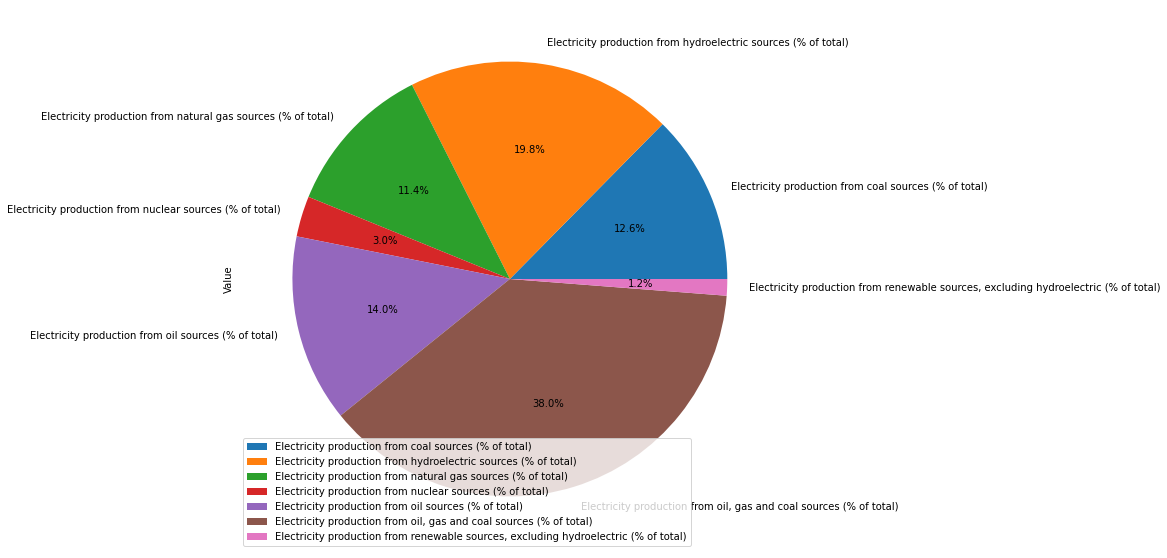

In [16]:
# Analysis of Production Data by grouping the data on Indicator then printing the Pie Chart
production_data.groupby(['IndicatorName']).mean().plot(kind='pie', y='Value', figsize=(15, 10), autopct='%1.1f%%')

In [17]:
# Printing of Indicator-wise energy production
production_data.groupby(['IndicatorName']).mean()["Value"]

IndicatorName
Electricity production from coal sources (% of total)                                  19.605714
Electricity production from hydroelectric sources (% of total)                         30.822572
Electricity production from natural gas sources (% of total)                           17.731533
Electricity production from nuclear sources (% of total)                                4.694025
Electricity production from oil sources (% of total)                                   21.690932
Electricity production from oil, gas and coal sources (% of total)                     59.028179
Electricity production from renewable sources, excluding hydroelectric (% of total)     1.908962
Name: Value, dtype: float64

In [18]:
# Filtering the data for CO2 emissions from electricty and heat production and displaying the header data
co2_emission = electricity_data[electricity_data["IndicatorName"] == "CO2 emissions from electricity and heat production, total (% of total fuel combustion)"]
co2_emission.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
282,Central Europe and the Baltics,CEB,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,1960,42.271822
413,Early-demographic dividend,EAR,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,1960,19.737627
603,East Asia & Pacific,EAS,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,1960,32.307388
1106,Euro area,EMU,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,1960,28.492476
1262,Europe & Central Asia,ECS,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,1960,30.566507


<AxesSubplot:xlabel='Year'>

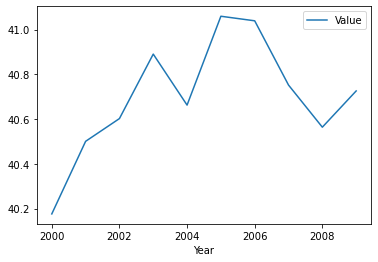

In [19]:
#Plotting the data in the range of year 2000 to 2010
co2_emission[co2_emission["Year"].isin(range(2000, 2010))].groupby("Year").mean().plot(y="Value")